<a href="https://colab.research.google.com/github/dzen90/neuralnet/blob/main/firstnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import scipy.special
import scipy.ndimage
import imageio
import matplotlib.pyplot
%matplotlib inline

In [ ]:
!pwd

/content


In [ ]:
class neuralNetwork():

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate

        #self.wih = numpy.random.rand(self.hnodes, self.inodes) - 0.5
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        #self.who = numpy.random.rand(self.onodes, self.hnodes) - 0.5
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)

        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                        numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                        numpy.transpose(inputs))
        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin = 2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin = 2).T
        final_inputs = self.inverse_activation_function(final_outputs)
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs

In [ ]:
input_nodes = 28 * 28
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.01

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open('mnist_dataset/mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


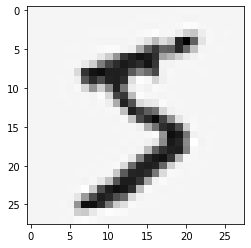

In [ ]:
# rotate image
all_values = training_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
inputs_plus10_img = scipy.ndimage.interpolation.rotate(image_array, 10, cval=0.01, reshape=False)
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")
matplotlib.pyplot.imshow(inputs_plus10_img, cmap="Greys", interpolation="None")

In [ ]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        image_array = inputs.reshape(28, 28)
        inputs_plus10_img = \
            scipy.ndimage.interpolation.rotate(image_array, 10, cval=0.01, reshape=False).reshape(784)
        inputs_minus10_img = \
            scipy.ndimage.interpolation.rotate(image_array, -10, cval=0.01, reshape=False).reshape(784)
        #image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
        #matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        n.train(inputs_plus10_img, targets)
        n.train(inputs_minus10_img, targets)
        pass
    pass


In [ ]:
number_of_images = 10
for img_num in range(number_of_images):
    #img_array = scipy.misc.imread('images/img0.png', flatten=True)
    img_array = imageio.imread('images/img' + str(img_num) + '.png', as_gray=True)
    #matplotlib.pyplot.imshow(255.0 - img_array, cmap="Greys", interpolation="None")
    img_data = 255.0 - img_array.reshape(28*28)
    inputs = numpy.asfarray(img_data) / 255.0 * 0.99 + 0.01
    img_data = (img_data / 255.0 * 0.99) + 0.01

    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(img_num, label)

0 0
1 8
2 2
3 3
4 4
5 5
6 6
7 3
8 8
9 3


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.36329412 0.406
 0.604      1.         

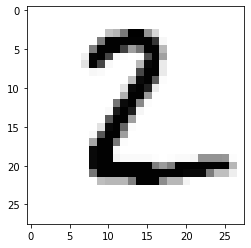

In [ ]:
img_array = imageio.imread('images/test2.png', as_gray=True)
matplotlib.pyplot.imshow(255.0 - img_array, cmap="Greys", interpolation="None")
img_data = 255.0 - img_array.reshape(28*28)
inputs = numpy.asfarray(img_data) / 255.0 * 0.99 + 0.01
print(inputs)
img_data = (img_data / 255.0 * 0.99) + 0.01
outputs = n.query(inputs)
label = numpy.argmax(outputs)
print(outputs)

In [ ]:
test_data_file = open('mnist_dataset/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
i = 0
for datastring in test_data_list:
    all_values = datastring.split(',')
    image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
    matplotlib.pyplot.imsave('images/test' + str(i) + '.png', image_array, cmap="Greys")
    i += 1

In [ ]:
all_values = test_data_list[1].split(',')
#print(all_values[0])
#print(all_values[1:])
inputs = numpy.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
print(inputs)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.46035294 0.49529412
 0.67388235 1.    

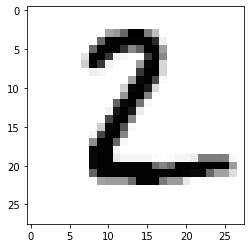

In [ ]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")
matplotlib.pyplot.imsave('images/test2.png', image_array, cmap="Greys")

In [ ]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    #print('Correct label:', correct_label)
    inputs = numpy.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    #5print('Network response:', label)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
scorecard_array = numpy.asarray(scorecard)
print('Efficiency:', scorecard_array.sum() / scorecard_array.size)

Efficiency: 0.9684


[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


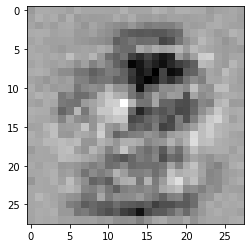

In [ ]:
# run backwards
label = 9
targets = numpy.zeros(output_nodes) + 0.01
targets[label] = 0.99
print(targets)
image_data = n.backquery(targets)
matplotlib.pyplot.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')